In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(r"C:\Users\Ariel\Desktop\Practice\Python\fcc-forum-pageviews.csv", index_col='date')

# Clean data
top2_5percentile = df['value'].quantile(0.975)
bottom2_5percentile = df['value'].quantile(0.025)

df = df[(df['value'] > bottom2_5percentile) & (df['value'] <= top2_5percentile)].sort_index()


def draw_line_plot():
    df_line = df.copy()
    df_line.reset_index(inplace=True)

    # Converting df to datetime
    df_line['date'] = pd.to_datetime(df_line['date'].astype('str'), format='%Y-%m-%d')

    # Draw line plot
    #Setting style and figure size
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(1,1,figsize=(40,10))

    #Lineplot
    sns.lineplot(data=df_line, x='date', y='value', color='red')

    # Assigning custom title and labels
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')


    # Creating a filter where months January and July are selected
    jan_jul_dates = df_line[((df_line['date'].dt.month == 1) & (df_line['date'].dt.day == 1)) | ((df_line['date'].dt.month == 7) & (df_line['date'].dt.day == 1))]

    #Custom date format
    date_format = [date.strftime('%Y-%m') for date in jan_jul_dates['date']]

    # Setting xticks
    plt.xticks(jan_jul_dates['date'],date_format)

    #Removing grids
    plt.grid(False)

    # Save image and return fig (don't change this part)
    fig = fig.savefig('line_plot.png')
    return fig;

def draw_bar_plot():
    #This could be optimized
    df_bar = df.copy()
    df_bar.reset_index(inplace=True)
    df_bar['date'] = pd.to_datetime(df_bar['date'].astype('str'), format='%Y-%m-%d')
    df_bar['year'] = [d.year for d in df_bar.date]
    df_bar['month'] = [d.strftime('%B') for d in df_bar.date]
  
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()
    df_bar['year'] = pd.to_datetime(df_bar['year'].astype('str'), format='%Y')
    df_bar['month'] = pd.to_datetime(df_bar['month'].astype('str'), format='%B')
    df_bar['month'] = [d.strftime('%B') for d in df_bar['month']]
    df_bar['year'] = [d.year for d in df_bar['year']]
  
    df_bar = df_bar.reset_index()
    df_bar.drop(labels='index', axis=1, inplace=True)
  
    # Draw bar plot
    # Setting style and figure size
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    # Month order
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Barplot
    sns.barplot(data=df_bar, y='value', x='year', hue='month', palette='tab10', hue_order=month_order, err_kws={'linewidth': 0})

    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.xticks(rotation=90)

    # Legends
    plt.legend(title='Months')

    # Save image and return fig (don't change this part)
    fig = fig.savefig('bar_plot.png')
    return fig;

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['date'] = pd.to_datetime(df_box['date'].astype('str'), format='%Y-%m-%d')
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    #Setting figure and axis for subplots
    fig, ax = plt.subplots(1, 2, figsize = (30, 10))

    #Boxplot for Year-wise Box Plot (Trend)
    sns.boxplot(data=df_box, x='year', y='value', hue='year',ax=ax[0], palette='tab10', fliersize=2, legend=False)
    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Page Views')

    #Setting order of the months
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    #Boxplot for Month-wise Box Plot (Seasonality)
    sns.boxplot(data=df_box, x='month', y='value', hue='month',ax=ax[1], palette='tab10', fliersize=2, legend=False, order=month_order)
    ax[1].set_title('Month-wise Box Plot (Seasonality)')
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Page Views')

    plt.tight_layout()

    # Save image and return fig (don't change this part)
    fig = fig.savefig('box_plot.png')
    return fig;


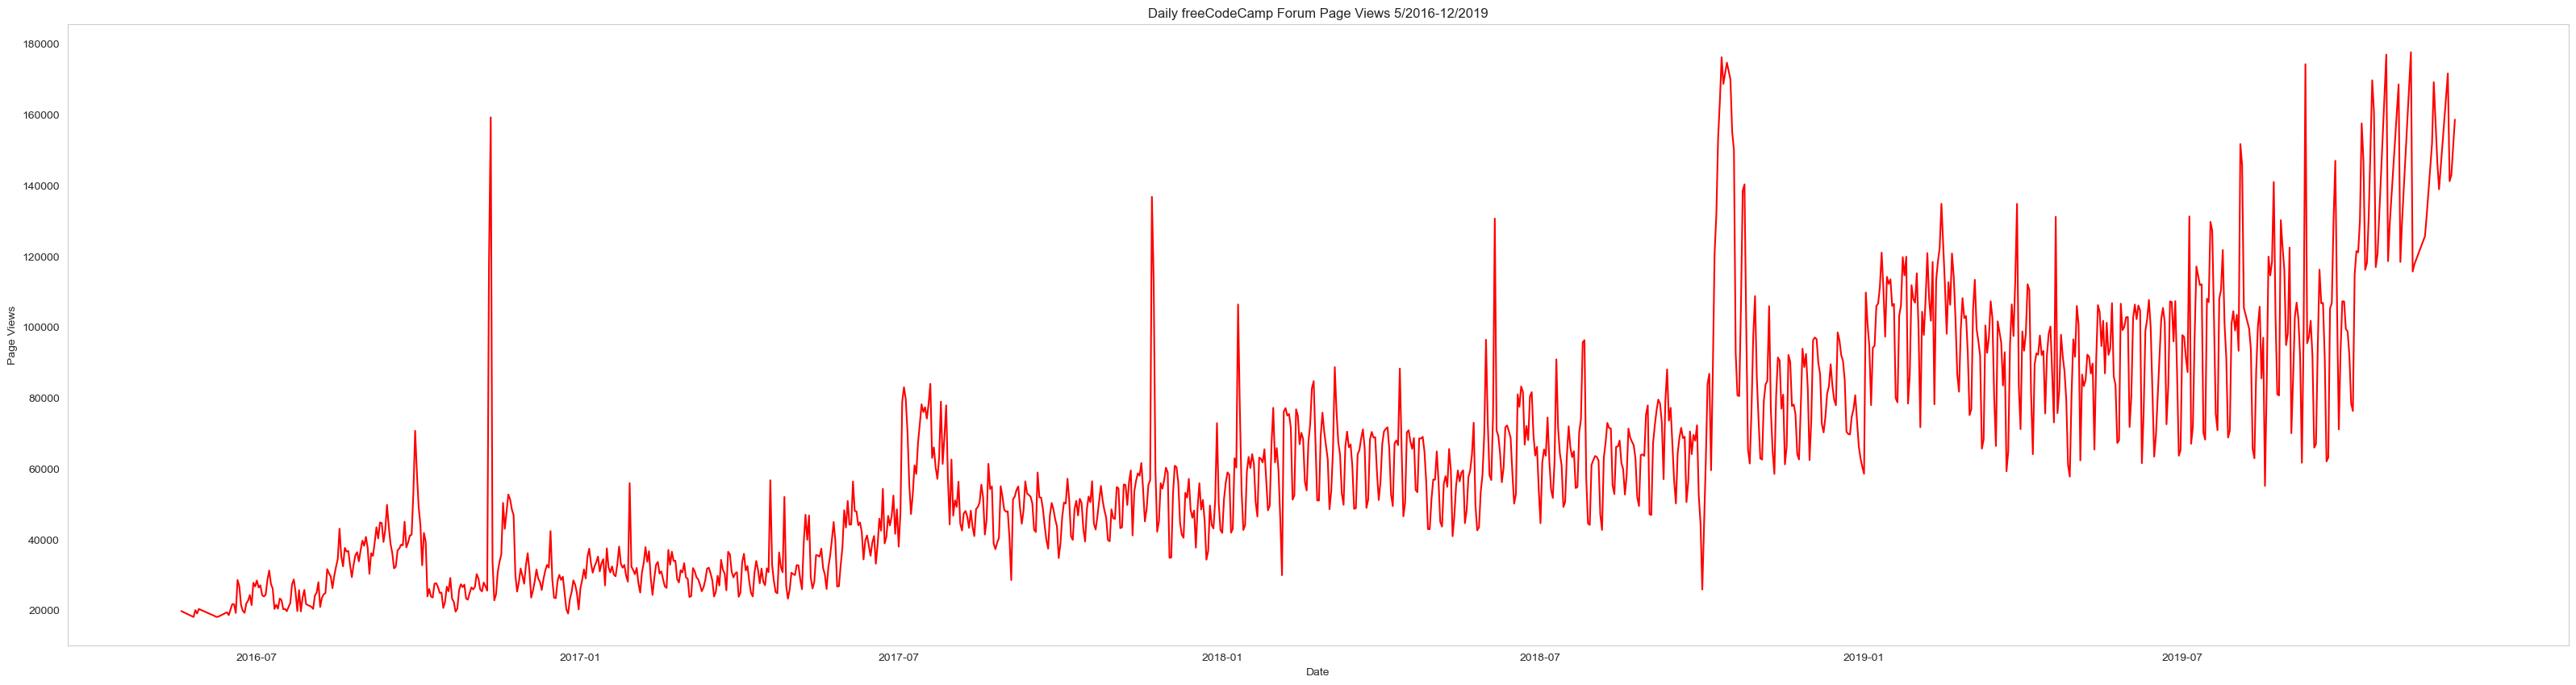

In [3]:
draw_line_plot()

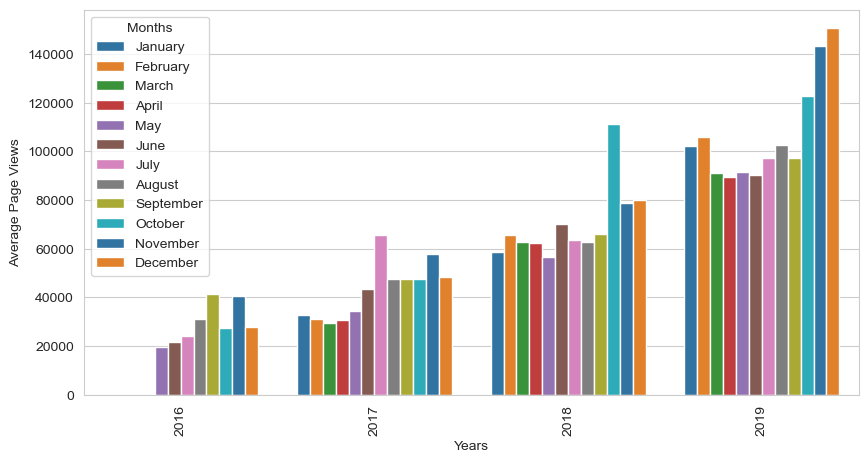

In [4]:
draw_bar_plot()

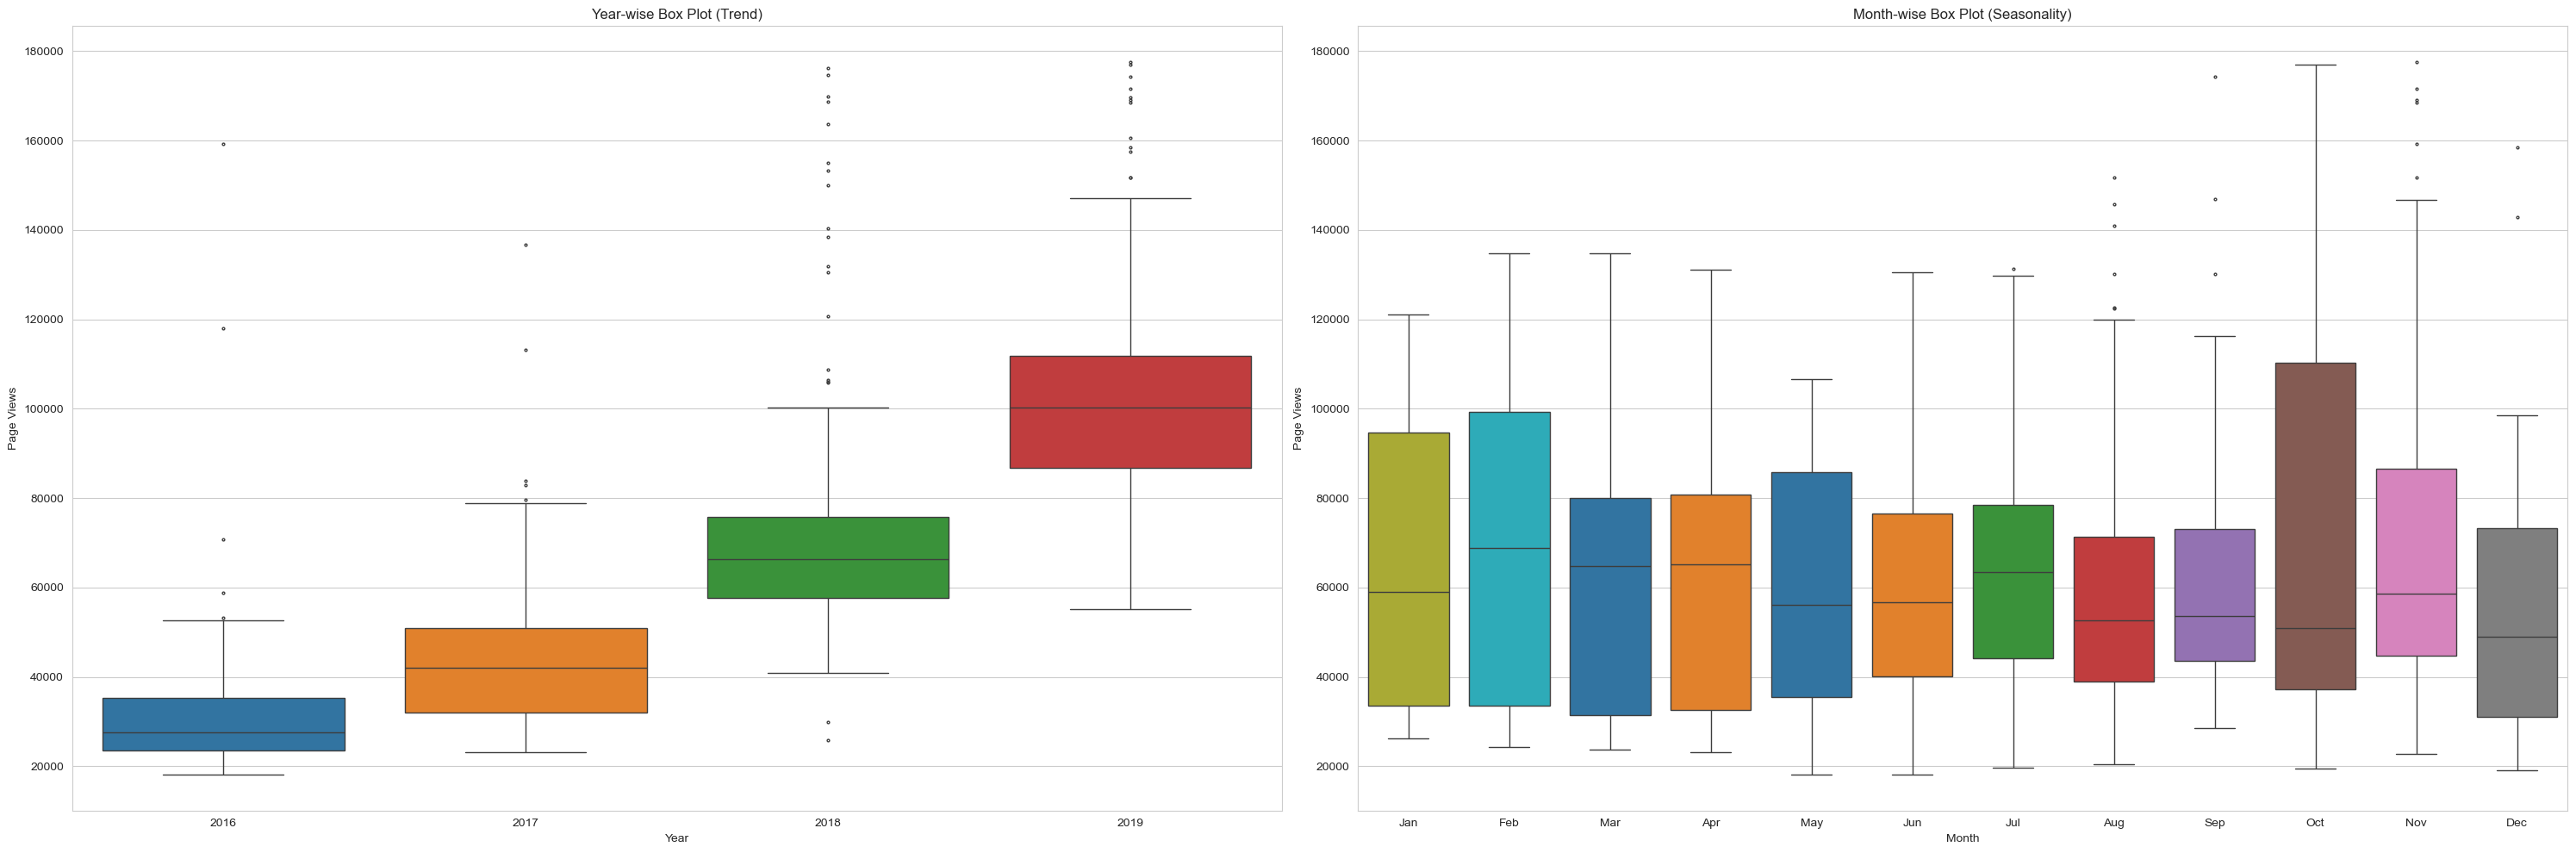

In [5]:
draw_box_plot()